In [1]:
import delivery_area
import db

In [2]:
db.clear_areas()
db.clear_couriers()

# Test add areas

In [3]:
myAreas = [
           [
            [0, 0],
            [0, 5],
            [5, 3],
            [7, 6],
            [6, 2]
           ],
           [
            [0, 0],
            [6, 2],
            [6, 0]
           ],
           [
            [0, 5],
            [0, 9],
            [7, 6],
            [5, 5]
           ],
           [
            [0, 5],
            [5, 5],
            [7, 6],
            [5, 3]
           ],
           [
            [0, 9],
            [0, 10],
            [10, 10],
            [9, 0],
            [7, 6]
           ],
           [
            [9, 0],
            [10, 10],
            [10, 0]
           ],
           [
            [6, 0],
            [6, 2],
            [7, 6],
            [9, 0]
           ]
]

areas = delivery_area.get_all_areas()
print(f'Now database have {len(areas)} areas')
delivery_area.add_areas(myAreas)
areas = delivery_area.get_all_areas()
print(f'After adding, database have {len(areas)} areas:')
for id_area, points in areas:
    print(f'id={id_area:<3} points:  x   y')
    for x, y in points:
        print(f'{x:>17} {y:>3}')
    print()

Now database have 0 areas
[[0, 0], [0, 5], [5, 3], [7, 6], [6, 2], [0, 0], [6, 2], [6, 0], [0, 5], [0, 9], [7, 6], [5, 5], [0, 5], [5, 5], [7, 6], [5, 3], [0, 9], [0, 10], [10, 10], [9, 0], [7, 6], [9, 0], [10, 10], [10, 0], [6, 0], [6, 2], [7, 6], [9, 0]]
After adding, database have 7 areas:
id=1   points:  x   y
                0   0
                0   5
                5   3
                7   6
                6   2

id=2   points:  x   y
                0   0
                6   2
                6   0

id=3   points:  x   y
                0   5
                0   9
                7   6
                5   5

id=4   points:  x   y
                0   5
                5   5
                7   6
                5   3

id=5   points:  x   y
                0   9
                0  10
               10  10
                9   0
                7   6

id=6   points:  x   y
                9   0
               10  10
               10   0

id=7   points:  x   y
                6 

# Test add couriers

In [4]:
couriers = db.get_all_couriers()
print(f'Now database have {len(couriers)} couriers')

for i in range(1, len(areas) + 1):
    delivery_area.assign_courier_to_area(f'Courier assigned to zone {i}', i)

couriers = db.get_all_couriers()
print(f'After adding, database have {len(couriers)} couriers:')
for id_courier, id_area, info in couriers:
    print(f'\tid={id_courier}, area={id_area}, description={info}')

Now database have 0 couriers
After adding, database have 7 couriers:
	id=1, area=1, description=Courier assigned to zone 1
	id=2, area=2, description=Courier assigned to zone 2
	id=3, area=3, description=Courier assigned to zone 3
	id=4, area=4, description=Courier assigned to zone 4
	id=5, area=5, description=Courier assigned to zone 5
	id=6, area=6, description=Courier assigned to zone 6
	id=7, area=7, description=Courier assigned to zone 7


# Test assgin order to courier

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon

(1, 'Courier assigned to zone 1')


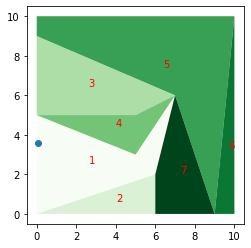

(7, 'Courier assigned to zone 7')


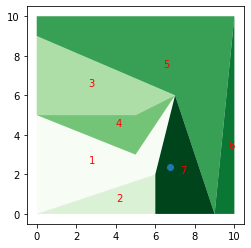

(4, 'Courier assigned to zone 4')


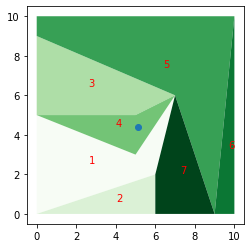

(5, 'Courier assigned to zone 5')


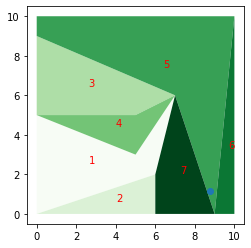

(3, 'Courier assigned to zone 3')


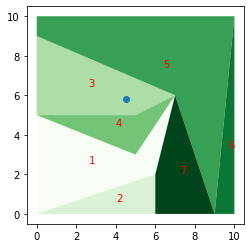

(5, 'Courier assigned to zone 5')


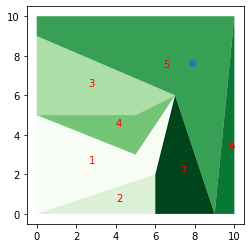

(5, 'Courier assigned to zone 5')


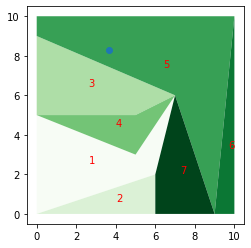

(5, 'Courier assigned to zone 5')


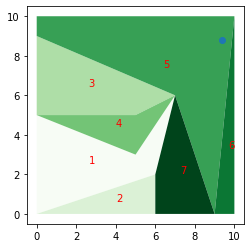

(5, 'Courier assigned to zone 5')


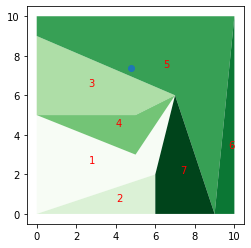

(1, 'Courier assigned to zone 1')


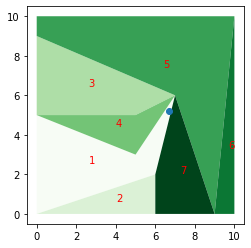

In [6]:
boundary = gpd.GeoSeries([Polygon(area[1]) for area in areas])

for _ in range(10):
    ax = boundary.plot(cmap="Greens")

    for i, geo in boundary.centroid.iteritems():
        ax.annotate(s=i+1, xy=[geo.x, geo.y], color="red")
    
    point = np.random.rand(2)*10
    plt.plot(*point, 'o')
    print(delivery_area.assign_courier_for_delivery(point))
    plt.show()

# Test exception

In [9]:
from delivery_area import Status400, Status404
try:
    print("test get_id_area on status 400: ", end='')
    delivery_area.get_id_area([0])
except Status400:
    print(True)
else:
    print(False)

try:
    print("test get_id_area on status 404: ", end='')
    delivery_area.get_id_area([-1, -1])
except Status404:
    print(True)
else:
    print(False)

try:
    print("test add_area on status 400: ", end='')
    delivery_area.add_area([0, 2, 3])
except Status400:
    print(True)
else:
    print(False)

try:
    print("test get_area_points on status 404: ", end='')
    delivery_area.get_area_points(134)
except Status404:
    print(True)
else:
    print(False)

try:
    print("test assign_courier_to_area on status 404: ", end='')
    delivery_area.assign_courier_to_area('wqe', 1234)
except Status404:
    print(True)
else:
    print(False)

try:
    print("test assign_courier_for_delivery on status 404: ", end='')
    delivery_area.assign_courier_for_delivery([0, -1])
except Status404:
    print(True)
else:
    print(False)


test get_id_area on status 400: True
test get_id_area on status 404: True
test add_area on status 400: True
test get_area_points on status 404: True
test assign_courier_to_area on status 404: True
test assign_courier_for_delivery on status 404: True
